# The moments of the distribution for protein in a two- and three-state promoter.

(c) 2017 Manuel Razo. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT)

In [1]:
import pickle
import dill # Library that we will use to export lambdify functions

# To compute symbolic expressions
import sympy
sympy.init_printing(use_unicode=True, use_latex=True) # print outputs in LaTeX

# Import matplotlib stuff for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

# Seaborn, useful for graphics
import seaborn as sns

# Import the utils for this project
import chann_cap_utils as chann_cap

# Set PBoC plotting style
# chann_cap.set_plotting_style()

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

# figdir = '../../fig/chemical_master_analytic_mRNA/'
tmpdir = '../../tmp/'

### $\LaTeX$ macros
$\newcommand{kpon}{k^p_{\text{on}}}$
$\newcommand{kpoff}{k^p_{\text{off}}}$
$\newcommand{kron}{k^r_{\text{on}}}$
$\newcommand{kroff}{k^r_{\text{off}}}$
$\newcommand{rm}{r _m}$
$\newcommand{gm}{\gamma _m}$
$\newcommand{mm}{\left\langle m \right\rangle}$
$\newcommand{ee}[1]{\left\langle #1 \right\rangle}$
$\newcommand{bb}[1]{\mathbf{#1}}$

# Two-state promoter (protein)

In this section we will perform the linear algebra to solve for the steady-state moments of the protein distribution.

Up to this stage we wrote the chemical master equation in matrix notation and did some tricks when it came to compute the $n^{\text{th}}$ moment. Now we will use the equations we obtained for the time derivative of the protein distribution moments and set that to steady-state to solve for the moments themselves.

Let's first define the `sympy` variables that we will need for the two- and three-state promoter.

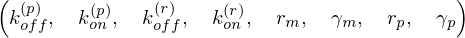

In [2]:
# Define rate constant variables
kp_off, kp_on = sympy.symbols('{k_{off}^{(p)}} {k_{on}^{(p)}}')
kr_off, kr_on = sympy.symbols('{k_{off}^{(r)}} {k_{on}^{(r)}}')

# Define degradation rate and production rate
rm, gm = sympy.symbols('r_m gamma_m')
rp, gp = sympy.symbols('r_p gamma_p')

kp_off, kp_on, kr_off, kr_on, rm, gm, rp, gp

Let's now define a function that generates a `sympy` variable of the form $\left\langle x^n \right\rangle$ to easily define the variables to save the moments.

In [3]:
def moment_sympy(var, moment):
    '''
    Shortcut to generate variables of the form <var**n> in sympy to facilitate the
    definition of the moment variables
    Parameters
    ----------
    var : string.
        variable name string that should be put inside the <> parenthesis.
    moment : int.
        exponent of the moment to be defined.
    '''
    if moment == None:
        return sympy.Symbol('{\\langle ' + var + '\\rangle}')
    else:
        return sympy.Symbol('{\\langle ' + var + '^{:d}'.format(moment) +\
                            '\\rangle}')

Now let's define the moment variables for the unregulated promoter. We will do it for both the mRNA and the protein since the protein moments depend also on mRNA moments.

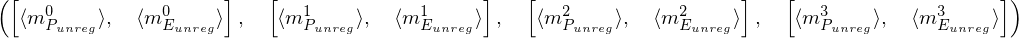

In [4]:
# Define the string for the states
m_unreg = ['m_{P_{unreg}}', 'm_{E_{unreg}}']

# Define the zeroth moments
m0_unreg = [moment_sympy(x, 0) for x in m_unreg]
# Define the first moments
m1_unreg = [moment_sympy(x, 1) for x in m_unreg]
# Define the second moments
m2_unreg = [moment_sympy(x, 2) for x in m_unreg]
# Define the second moments
m3_unreg = [moment_sympy(x, 3) for x in m_unreg]

m0_unreg, m1_unreg, m2_unreg, m3_unreg

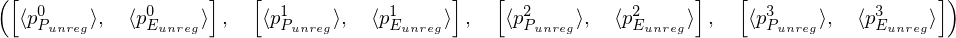

In [5]:
# Define the string for the states
p_unreg = ['p_{P_{unreg}}', 'p_{E_{unreg}}']

# Define the zeroth moments
p0_unreg = [moment_sympy(x, 0) for x in p_unreg]
# Define the first moments
p1_unreg = [moment_sympy(x, 1) for x in p_unreg]
# Define the second moments
p2_unreg = [moment_sympy(x, 2) for x in p_unreg]
# Define the second moments
p3_unreg = [moment_sympy(x, 3) for x in p_unreg]

p0_unreg, p1_unreg, p2_unreg, p3_unreg

In [6]:
# define "global" moments and cross correlations
mm0_unreg = moment_sympy('\mathbf{m}_u', 0)
mm1_unreg = moment_sympy('\mathbf{m}_u', None)
mm2_unreg = moment_sympy('\mathbf{m}_u', 2)
mm3_unreg = moment_sympy('\mathbf{m}_u', 3)
pp0_unreg = moment_sympy('\mathbf{p}_u', 0)
pp1_unreg = moment_sympy('\mathbf{p}_u', None)
pp2_unreg = moment_sympy('\mathbf{p}_u', 2)
pp3_unreg = moment_sympy('\mathbf{p}_u', 3)

# Cross corelations
mmpp_unreg = moment_sympy('\mathbf{mp}_u', None)
mm2pp_unreg = moment_sympy('\mathbf{m}^2\mathbf{p}_u', None)
mmpp2_unreg = moment_sympy('\mathbf{m}\mathbf{p}^2_u', None)

mm0_unreg, mm1_unreg, mm2_unreg, mm3_unreg,\
pp0_unreg, pp1_unreg, pp2_unreg, pp3_unreg,\
mmpp_unreg, mm2pp_unreg, mmpp2_unreg

Now we will define the state transition matrix $\mathbf{K}^u$, the mRNA production matrix $\mathbf{R}^u_m$ and the mRNA degradation matrix $\mathbf{\Gamma}^u_m$.

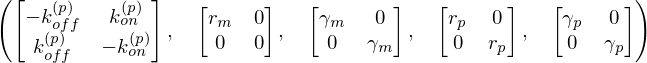

In [7]:
# Define the rate constant matrix
Km_unreg = sympy.Matrix([[-kp_off, kp_on], 
                           [kp_off, -kp_on]])
# Define the mRNA production matrix
Rm_unreg = sympy.Matrix([[rm, 0], 
                         [0, 0]])
# Define the mRNA degradation matrix
Gm_unreg = sympy.Matrix([[gm, 0],
                         [0, gm]])

# Define the protein production matrix
Rp_unreg = sympy.Matrix([[rp, 0], 
                         [0, rp]])
# Define the protein degradation matrix
Gp_unreg = sympy.Matrix([[gp, 0],
                         [0, gp]])


Km_unreg, Rm_unreg, Gm_unreg, Rp_unreg, Gp_unreg

### Import mRNA moments
Let's import the solutions we obtained for the mRNA moments that are saved in a `pickle` object.

In [8]:
with open(tmpdir + 'two_state_mRNA_solutions.pkl', 'rb') as file:
    zero_sol_unreg_m = pickle.load(file)
    first_sol_unreg_m = pickle.load(file)
    second_sol_unreg_m = pickle.load(file)
    third_sol_unreg_m = pickle.load(file)

We now import the expressions of the moments in termos of the global moments

In [9]:
with open(tmpdir + 'two_state_mRNA_moments.pkl', 'rb') as file:
    first_unreg_moments_m = pickle.load(file)
    second_unreg_moments_m = pickle.load(file)
    third_unreg_moments_m = pickle.load(file)

### Zeroth moment two-state promoter
In order to solve for the two-state promoter we have two equations to use
$$
1 = \mathbf{u} \cdot \left\langle \mathbf{m}^0 \right\rangle,
$$
where $u = (1, 1)$ and $\left\langle \mathbf{m}^0 \right\rangle$ is the vector containing all the states, and
$$
\mathbf{0} = \mathbf{K}^u_m \left\langle \mathbf{m}^0 \right\rangle.
$$

We will use the linear algebra solver where we write an extended matrix with the last column being the right hand side of these equations.

Let's now define this extended matrix.

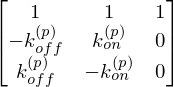

In [10]:
# Add the extra row for the normalization constraint
K_sys_unreg = Km_unreg.row_insert(0, sympy.Matrix([1, 1]).transpose())

# Define right-side array
b = sympy.Matrix([1, 0, 0])

# Define augmented matrix
zero_aug_unreg = K_sys_unreg.col_insert(2, b)
zero_aug_unreg

Now we solve the equation for the two state moments.

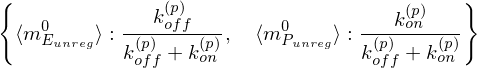

In [11]:
# Solve linear system for the three zeroth moments
zero_sol_unreg = sympy.solve_linear_system(zero_aug_unreg, *m0_unreg)
zero_sol_unreg

### First moment two-state promoter (protein)

Now that we have the zeroth moment that indicates the probability of being on either state let's now compute the first moment. For this we have the matrix equation
$$
\mathbf{0} = \left( \mathbf{K}^u - \mathbf{\Gamma}^u_p  \right)
             + \mathbf{R}^u_p \left\langle \mathbf{m} \right\rangle.
$$

Let's write this system in the form of the augmented matrix.

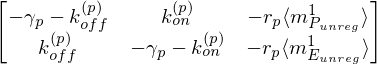

In [12]:
# Define augmented matrix for first moment
first_aug_unreg = (Km_unreg - Gp_unreg).col_insert(2, 
                                            -Rp_unreg * sympy.Matrix(m1_unreg))
first_aug_unreg

And again we use the `sympy` solver to solve for the first moments

In [13]:
# Solve linear system for the first protein moments
first_sol_unreg_p = sympy.solve_linear_system(first_aug_unreg, *p1_unreg)

We now sum both elements and substitute the solution for the zeroth moments

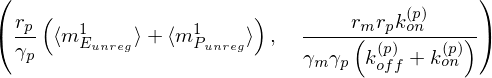

In [14]:
# Sum the results for the first moments
first_unreg_p = sum(first_sol_unreg_p.values()).simplify()
# Substitute the solutions for the mRNA first and zeroth moment
first_unreg_p_s = first_unreg_p.subs(first_sol_unreg_m).\
                            subs(zero_sol_unreg).simplify()
# Display solution in terms of the mRNA global first moment
first_unreg_p,\
first_unreg_p_s # Disiplay substituted solution.

Let's display the solution for the first moment in terms of the global moments

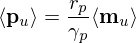

In [15]:
first_unreg_moments_p = first_unreg_p.subs(sum(m1_unreg), mm1_unreg)
sympy.Eq(pp1_unreg, first_unreg_moments_p)

### mRNA-protein correlation two-state promoter

The computation of the second moment $\left\langle \mathbf{p}^2 \right\rangle$ depends on the correlation $\left\langle \mathbf{mp} \right\rangle$. To compute this correlation we have the equation
$$
\mathbf{0} = \left( \mathbf{K}^u - \mathbf{\Gamma}^u_m -  \mathbf{\Gamma}^u_p  \right)
             \left\langle \mathbf{mp} \right\rangle 
             + \mathbf{R}^u_m \left\langle \mathbf{p} \right\rangle
             + \mathbf{R}^u_p \left\langle \mathbf{m}^2 \right\rangle
$$
Let's define this augmented matrix.

In [16]:
# Define the string for the states
corr_unreg = ['mp_{P_{unreg}}', 'mp_{E_{unreg}}']

# Define the zeroth moments
mp_unreg = [moment_sympy(x, None) for x in corr_unreg]
mp_unreg

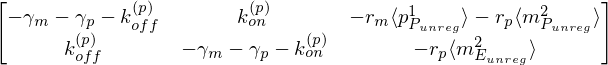

In [17]:
# define augmented matrix for correlation
corr_aug_unreg = (Km_unreg - Gm_unreg - Gp_unreg).col_insert(2,
                  - Rm_unreg * sympy.Matrix(p1_unreg)\
                  - Rp_unreg * sympy.Matrix(m2_unreg))
corr_aug_unreg

Now let's solve the system.

In [18]:
# Solve linear system for the three moments
corr_sol_unreg = sympy.solve_linear_system(corr_aug_unreg, *mp_unreg)

The sum of these terms gives the correlation we are looking for.

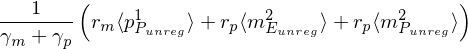

In [19]:
# Sum the terms of the correlation
corr_unreg = sum(corr_sol_unreg.values()).simplify()
# Substitutte relevant solutions
corr_unreg_s = corr_unreg.subs(first_sol_unreg_p).subs(second_sol_unreg_m).\
               subs(first_sol_unreg_m).subs(zero_sol_unreg)
    
# Display solution without substitutions
corr_unreg

We now display the solution in terms of the global moments.

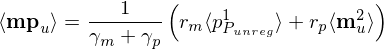

In [20]:
# Display correlation as a functiono f the second mRNA moment
corr_moments = corr_unreg.collect(rp).subs(sum(m2_unreg), mm2_unreg)
sympy.Eq(mmpp_unreg, corr_moments)

LEt's implement the approximation of $\gm \gg \gamma_p$. This would give us

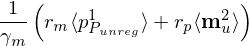

In [21]:
corr_moments_approx = corr_moments.subs(gm + gp, gm)
corr_moments_approx

### Second moment two-state promoter

For the second moment we have an equation of the form
$$
\mathbf{0} = \left( \mathbf{K}^u - 2 \mathbf{\Gamma}^u_p \right) 
             \left\langle \mathbf{p}^2 \right\rangle
             + \mathbf{\Gamma}^u_p \left\langle \mathbf{p} \right\rangle
             + \mathbf{R}^u_p \mm
             + 2 \mathbf{R}^u_p \left\langle \mathbf{mp} \right\rangle
$$

Let's again define this augmented matrix.

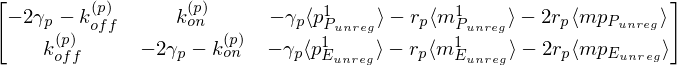

In [22]:
# Define augmented matrix for second moment
second_aug_unreg = (Km_unreg - 2 * Gp_unreg).col_insert(2, 
                    - Gp_unreg * sympy.Matrix(p1_unreg)\
                    - Rp_unreg * sympy.Matrix(m1_unreg)\
                    - 2 * Rp_unreg * sympy.Matrix(mp_unreg))
second_aug_unreg

Having defined the matrix let's solve the system.

In [23]:
# Solve linear system for the three moments
second_sol_unreg_p = sympy.solve_linear_system(second_aug_unreg, *p2_unreg)

Again let's add both of these moments to obtain the global second moment.

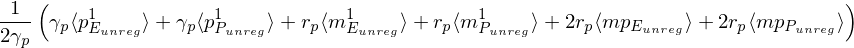

In [24]:
# Sum the soltuon of second moments
second_unreg_p = sum(second_sol_unreg_p.values()).simplify()
# Substitute relevant solutions
second_unreg_p_s = second_unreg_p.subs(corr_sol_unreg).subs(first_sol_unreg_p).\
                 subs(second_sol_unreg_m).subs(first_sol_unreg_m).\
                 subs(zero_sol_unreg).simplify()

# Display solution without substitutions
second_unreg_p

Again let's show the solution using the global moments.

The complexity of the substitutions comes from step-by-step manually recognizing patterns.

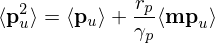

In [25]:
# Display solution
second_unreg_moments_p = second_unreg_p.\
            collect(gp).collect(rp).\
            subs(sum(p1_unreg), pp1_unreg).\
            subs(sum(m1_unreg), mm1_unreg).\
            subs(sum(2 * mp_unreg), 2 * mmpp_unreg).\
            expand().\
            subs(rp / (2 * gp) * mm1_unreg, pp1_unreg / 2)
sympy.Eq(pp2_unreg,  second_unreg_moments_p)

Using the solution for $\left\langle \mathbf{mp} \right\rangle$ with the $\gm \gg \gamma_p$ approximation gives

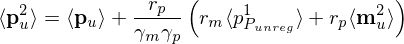

In [26]:
second_unreg_moments_approx = second_unreg_moments_p.\
                              subs(mmpp_unreg, corr_moments_approx).\
                              collect(rp / (gm * gp))

sympy.Eq(pp2_unreg, second_unreg_moments_approx)

### Noise $\eta$ and fano-factor

Having the first and second moment let's compute the variance and the fano-factor to compare it with the results from Sharehzaei and Swain.

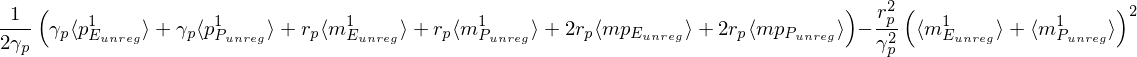

In [27]:
# Compute the variance of the unregulated promoter
var_unreg_p = second_unreg_p - first_unreg_p**2
var_unreg_p_s = var_unreg_p.subs(corr_sol_unreg).\
                            subs(first_sol_unreg_p).\
                            subs(second_sol_unreg_m).\
                            subs(first_sol_unreg_m).\
                            subs(zero_sol_unreg).simplify()
var_unreg_p

We again simplify this solution as a function of global moments.

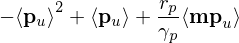

In [28]:
var_unreg_moments_p = second_unreg_moments_p - pp1_unreg**2
var_unreg_moments_p

Or using the approximate solution for $\left\langle \mathbf{mp} \right\rangle$

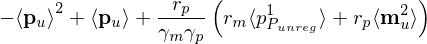

In [29]:
var_unreg_moments_approx = second_unreg_moments_approx - pp1_unreg**2
var_unreg_moments_approx

#### Fano-factor
We now turn to computing the **fano-factor**.

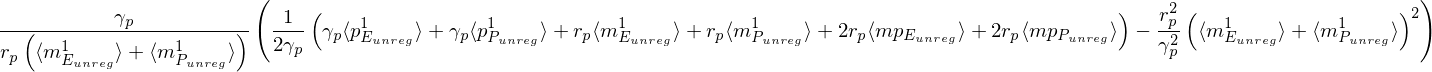

In [30]:
# Compute the fano factor of the unregulated promoter
fano_unreg_p = var_unreg_p / first_unreg_p
fano_unreg_s = fano_unreg_p.subs(corr_sol_unreg).\
                          subs(first_sol_unreg_p).\
                          subs(second_sol_unreg_m).\
                          subs(first_sol_unreg_m).\
                          subs(zero_sol_unreg)
fano_unreg_p

Again it is more clear to display this equation as a funciton of global moments.

The complexity of the substitutions comes from step-by-step recognizing parmeters in the equation.

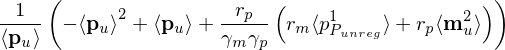

In [31]:
fano_unreg_moments_p = var_unreg_moments_approx / pp1_unreg 

fano_unreg_moments_p

#### Noise

Let's now compute the noise squared 
$$
\eta^2 = {\sigma_p^2 \over \left\langle \mathbf{p} \right\rangle^2}
$$

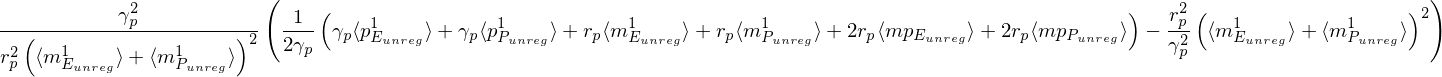

In [32]:
# Compute the fano factor of the unregulated promoter
noise_square_unreg_p = var_unreg_p / first_unreg_p**2
noise_square_unreg_p_s = noise_square_unreg_p.subs(corr_sol_unreg).\
                          subs(first_sol_unreg_p).\
                          subs(second_sol_unreg_m).\
                          subs(first_sol_unreg_m).\
                          subs(zero_sol_unreg)
noise_square_unreg_p

And again we substitute the global moments to display a more transparent expression.

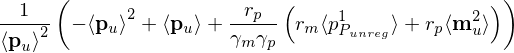

In [33]:
noise_square_unreg_moments = (var_unreg_moments_approx / pp1_unreg**2)
noise_square_unreg_moments

### Third moment two-state promoter $\ee{\bb{p}^3}$

#### Computing the cross correlations $\ee{\bb{mp}^2}$ and $\ee{\bb{m}^2\bb{p}}$

To compute the third moment $\ee{\bb{p}^3}$ we need to compute the correlation term $\ee{\bb{mp}^2}$. This correlation needs at the same time the correlation $\ee{\bb{m}^2\bb{p}}$. So we will solve for these two terms.

For the correlation $\ee{\bb{m}^2\bb{p}}$ we have the equation
$$
\bb{0} = \left( \bb{K}^u - 2 \bb{\Gamma}_p^u - \bb{\Gamma}_p^u \right) 
\ee{\bb{m}^2\bb{p}} +
\bb{R}_m^u \ee{\bb{p}} +
\left( \bb{R}_m^u + \bb{\Gamma}_m^u \right) \ee{\bb{mp}} +
\bb{R}_p^u \ee{\bb{m}^3}.
$$

Let's define this augmented matrix.

In [34]:
# Define the string for the states
corr_unreg = ['m^2p_{P_{unreg}}', 'm^2p_{E_{unreg}}']

# Define the zeroth moments
m2p_unreg = [moment_sympy(x, None) for x in corr_unreg]
m2p_unreg

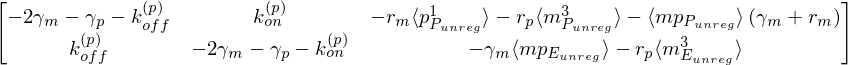

In [35]:
# define augmented matrix for correlation
m2p_aug_unreg = (Km_unreg - 2 * Gm_unreg - Gp_unreg).col_insert(2,
                  - Rm_unreg * sympy.Matrix(p1_unreg)\
                  - (Rm_unreg + Gm_unreg) * sympy.Matrix(mp_unreg)\
                  - Rp_unreg * sympy.Matrix(m3_unreg))
m2p_aug_unreg 

Let's now solve the system.

In [36]:
# Solve linear system for the three moments
m2p_sol_unreg = sympy.solve_linear_system(m2p_aug_unreg, *m2p_unreg)

By adding the terms we can find the correlation we are looking for

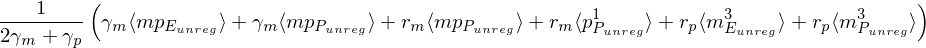

In [37]:
# Sum the terms of the m2pelation
corr_m2p_unreg = sum(m2p_sol_unreg.values()).simplify()
# Substitutte relevant solutions
corr_m2p_unreg_s = corr_m2p_unreg.subs(corr_sol_unreg).\
              subs(first_sol_unreg_p).subs(second_sol_unreg_m).\
              subs(first_sol_unreg_m).subs(zero_sol_unreg)
    
# Display solution without substitutions
corr_m2p_unreg

Let's now display this solution as a function of the global moments.

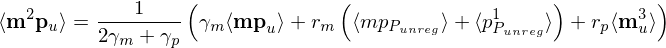

In [38]:
# Display m2pelation as a functiono f the second mRNA moment
m2p_moments = corr_m2p_unreg.collect(gm).subs(sum(mp_unreg), mmpp_unreg)\
                       .collect(rp).subs(sum(m3_unreg), mm3_unreg)\
                       .collect(rm)
sympy.Eq(mm2pp_unreg, m2p_moments)

#### $\ee{\bb{mp}^2}$
We have a solution for all these moments, so we can procced to compute the correlation $\ee{\bb{mp}^2}$. For that we have the equation
$$
\bb{0} = \left( \bb{K}^u - \bb{\Gamma}_m^u - 2 \bb{\Gamma}_p^u \right)
\ee{\bb{mp}^2} +
\bb{R}_m^u \ee{\bb{p}^2} +
2 \bb{R}_p^u \ee{\bb{m}^2\bb{p}} +
\bb{R}_p^u \ee{\bb{m}^2} +
\bb{\Gamma}_p^u \ee{\bb{mp}}.
$$

Let's define the agumented matrix for this correlation term.

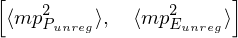

In [39]:
# Define the string for the states
corr_unreg = ['mp^2_{P_{unreg}}', 'mp^2_{E_{unreg}}']

# Define the zeroth moments
mp2_unreg = [moment_sympy(x, None) for x in corr_unreg]
mp2_unreg

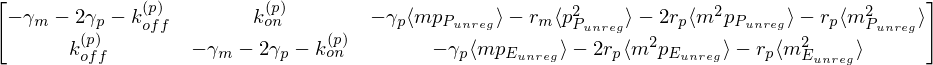

In [40]:
# define augmented matrix for correlation
mp2_aug_unreg = (Km_unreg - Gm_unreg - 2 * Gp_unreg).col_insert(2,
                  - Rm_unreg * sympy.Matrix(p2_unreg)\
                  - 2 * Rp_unreg * sympy.Matrix(m2p_unreg)\
                  - Rp_unreg * sympy.Matrix(m2_unreg)\
                  - Gp_unreg * sympy.Matrix(mp_unreg))
mp2_aug_unreg 

Let's solve the system.

In [41]:
# Solve linear system for the three moments
mp2_sol_unreg = sympy.solve_linear_system(mp2_aug_unreg, *mp2_unreg)

By adding the terms we can find the correlation we are looking for

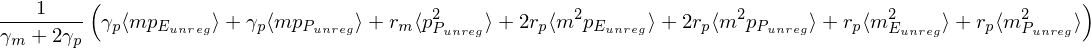

In [42]:
# Sum the terms of the mp2elation
corr_mp2_unreg = sum(mp2_sol_unreg.values()).simplify()
# Substitutte relevant solutions
corr_mp2_unreg_s = corr_mp2_unreg.subs(corr_sol_unreg).\
              subs(first_sol_unreg_p).subs(second_sol_unreg_m).\
              subs(first_sol_unreg_m).subs(zero_sol_unreg)
    
# Display solution without substitutions
corr_mp2_unreg

Let's now display this solution as a function of the global moments.

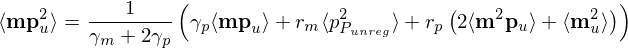

In [43]:
# Display correlation as a function of the second mRNA moment
mp2_moments = corr_mp2_unreg.collect(gp).subs(sum(mp_unreg), mmpp_unreg)\
                       .collect(rp).subs(sum(m2_unreg), mm2_unreg)\
                       .subs(sum(2 * m2p_unreg), 2 * mm2pp_unreg)
sympy.Eq(mmpp2_unreg, mp2_moments)

#### $\ee{\bb{p}^3}$

Finally having these two correlations in hand we can compute the third moment of the protein distribution $\ee{\mm{p}^3}$. For that we have the equation
$$
\bb{0} = \left( \bb{K}^u - 3 \bb{\Gamma}_p^u \right) \ee{\bb{p}^3} +
3 \bb{\Gamma}_p^u \ee{\bb{p}^2} -
\bb{\Gamma}_p^u \ee{\bb{p}} +
3 \bb{R}_p^u \ee{\bb{mp}^2} +
3 \bb{R}_p^u \ee{\bb{mp}} +
\bb{R}_p^u \ee{\bb{m}}.
$$

Let's define this agumented matrix.

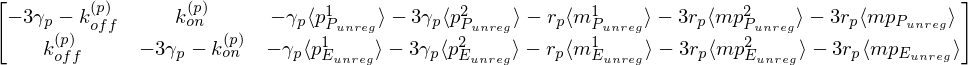

In [44]:
# define augmented matrix for correlation
p3_aug_unreg = (Km_unreg - 3 * Gp_unreg).col_insert(2,
                  - 3 * Gp_unreg * sympy.Matrix(p2_unreg)\
                  - Gp_unreg * sympy.Matrix(p1_unreg)\
                  - 3 * Rp_unreg * sympy.Matrix(mp2_unreg)\
                  - 3 * Rp_unreg * sympy.Matrix(mp_unreg)\
                  - Rp_unreg * sympy.Matrix(m1_unreg))
p3_aug_unreg 

Let's solve the linear system

In [45]:
third_sol_unreg_p = sympy.solve_linear_system(p3_aug_unreg, *p3_unreg)

Now let's add the solutions to obtain the desired moment.

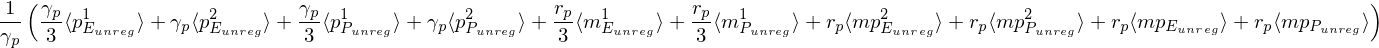

In [46]:
# Sum the soltuon of third moments
third_unreg_p = sum(third_sol_unreg_p.values()).simplify()
# Substitute relevant solutions
third_unreg_p_s = third_unreg_p.subs(mp2_sol_unreg).\
                    subs(m2p_sol_unreg).\
                    subs(second_sol_unreg_p).\
                    subs(corr_sol_unreg).\
                    subs(first_sol_unreg_p).\
                    subs(third_sol_unreg_m).\
                    subs(second_sol_unreg_m).\
                    subs(first_sol_unreg_m).\
                    subs(zero_sol_unreg)

# Display solution without substitutions
third_unreg_p

Let's write down this in terms of the global moments.

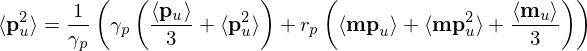

In [47]:
# Display solution
third_unreg_moments_p = third_unreg_p.\
            collect(gp).\
            subs(sum(p1_unreg) / 3, pp1_unreg / 3).\
            subs(sum(p2_unreg), pp2_unreg).\
            collect(rp).\
            subs(sum(m1_unreg) / 3, mm1_unreg / 3).\
            subs(sum(mp2_unreg), mmpp2_unreg).\
            subs(sum(mp_unreg), mmpp_unreg)
sympy.Eq(pp2_unreg,  third_unreg_moments_p)

---
### Export `lambdify` functions to `dill` objects

Since we want to keep the notebooks in an organized fashion, the numerical exploration of these functions will be done in a different notebook. Therefore here we will generate `lambdify` functions that will be saved into an object using the `dill` library.

Let' first generate lambdify functions for the moments.

In [48]:
# Define array containing variables
var = [kp_on, kp_off, rm, gm, rp, gp]
# Define lambdify functions for the first three moments
first_unreg_num = sympy.lambdify(var, first_unreg_p_s)
second_unreg_num = sympy.lambdify(var, second_unreg_p_s)
third_unreg_num = sympy.lambdify(var, third_unreg_p_s)

In [49]:
# Change dill setting to allow the export of the functions
dill.settings['recurse'] = True

# Open file to save functions
with open(tmpdir + 'two_state_protein_lambdify.dill', 'wb') as file:
    dill.dump(first_unreg_num, file)
    dill.dump(second_unreg_num, file)
    dill.dump(third_unreg_num, file)

---
# Three-state promoter (protein)
--- 
Let's now derive the moments for the three-state promoter. The matrix equations remain the same between the two- and the three-state promoter. The only difference is the definition of the state transition, production and degradation matrix.

Let's first define the moment variables

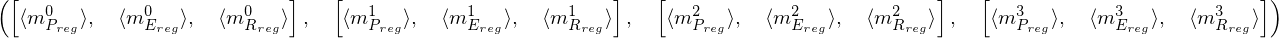

In [50]:
# Define the string for the states
m_reg = ['m_{P_{reg}}', 'm_{E_{reg}}', 'm_{R_{reg}}']

# Define the zeroth moments
m0_reg = [moment_sympy(x, 0) for x in m_reg]
# Define the first moments
m1_reg = [moment_sympy(x, 1) for x in m_reg]
# Define the second moments
m2_reg = [moment_sympy(x, 2) for x in m_reg]
# Define the second moments
m3_reg = [moment_sympy(x, 3) for x in m_reg]

m0_reg, m1_reg, m2_reg, m3_reg

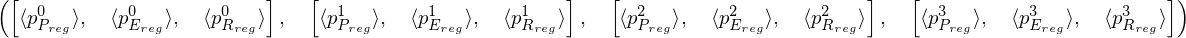

In [51]:
# Define the string for the states
p_reg = ['p_{P_{reg}}', 'p_{E_{reg}}', 'p_{R_{reg}}']

# Define the zeroth moments
p0_reg = [moment_sympy(x, 0) for x in p_reg]
# Define the first moments
p1_reg = [moment_sympy(x, 1) for x in p_reg]
# Define the second moments
p2_reg = [moment_sympy(x, 2) for x in p_reg]
# Define the third moments
p3_reg = [moment_sympy(x, 3) for x in p_reg]

p0_reg, p1_reg, p2_reg, p3_reg

In [52]:
# define "global" moments
mm0_reg = moment_sympy('\mathbf{m}_r', 0)
mm1_reg = moment_sympy('\mathbf{m}_r', None)
mm2_reg = moment_sympy('\mathbf{m}_r', 2)
mm3_reg = moment_sympy('\mathbf{m}_r', 3)
pp0_reg = moment_sympy('\mathbf{p}_r', 0)
pp1_reg = moment_sympy('\mathbf{p}_r', None)
pp2_reg = moment_sympy('\mathbf{p}_r', 2)
pp3_reg = moment_sympy('\mathbf{p}_r', 3)

# Cross corelations
mmpp_reg = moment_sympy('\mathbf{mp}_r', None)
mm2pp_reg = moment_sympy('\mathbf{m}^2\mathbf{p}_r', None)
mmpp2_reg = moment_sympy('\mathbf{m}\mathbf{p}^2_r', None)

mm0_reg, mm1_reg, mm2_reg, mm3_reg,\
pp0_reg, pp1_reg, pp2_reg, pp3_reg,\
mmpp_reg, mm2pp_reg, mmpp2_reg

In [53]:
with open(tmpdir + 'three_state_mRNA_solutions.pkl', 'rb') as file:
    first_sol_reg_m = pickle.load(file)
    second_sol_reg_m = pickle.load(file)
    third_sol_reg_m = pickle.load(file)

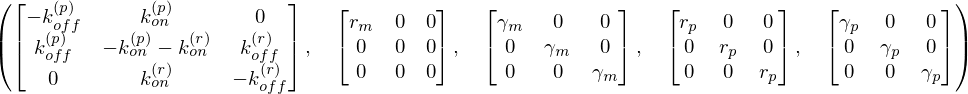

In [54]:
# Define the rate constant matrix
Km_reg = sympy.Matrix([[-kp_off, kp_on, 0], 
                         [kp_off, -(kp_on + kr_on), kr_off],
                         [0, kr_on, -kr_off]])
# Define the production matrix
Rm_reg = sympy.Matrix([[rm, 0, 0],
                       [0, 0, 0],
                       [0, 0, 0]])
# Define the degradation matrix
Gm_reg = sympy.Matrix([[gm, 0, 0],
                       [0, gm, 0],
                       [0, 0, gm]])

# Define the production matrix
Rp_reg = sympy.Matrix([[rp, 0, 0],
                       [0, rp, 0],
                       [0, 0, rp]])

# Define the production matrix
Gp_reg = sympy.Matrix([[gp, 0, 0],
                       [0, gp, 0],
                       [0, 0, gp]])


Km_reg, Rm_reg, Gm_reg, Rp_reg, Gp_reg

### Zeroth moment three-state promoter
To solve the zeroth moment for the three-state promoter we use the same set of equations as for the two-state promoter, this is
$$
1 = \mathbf{u} \cdot \left\langle \mathbf{m}^0 \right\rangle,
$$
where this time $u = (1, 1, 1)$ and $\left\langle \mathbf{m}^0 \right\rangle$ is the vector containing all *three* states. We use as well
$$
\mathbf{0} = \mathbf{K}^r \left\langle \mathbf{m}^0 \right\rangle.
$$

We will again use the linear algebra solver where we write an extended matrix with the last column being the right hand side of these equations.

Let's now define this extended matrix.

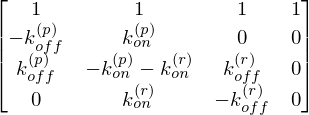

In [55]:
# Add the extra row for the normalization constraint
K_sys_reg = Km_reg.row_insert(0, sympy.Matrix([1, 1, 1]).transpose())

# Define right-side array
b = sympy.Matrix([1, 0, 0, 0])

# Define augmented matrix
zero_aug_reg = K_sys_reg.col_insert(3, b)
zero_aug_reg

Let's solve the system for our three zeroth moments.

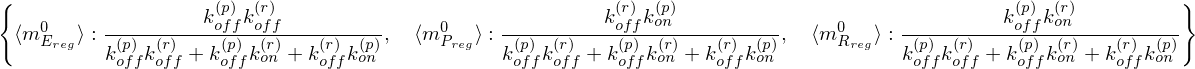

In [56]:
# Solve linear system for the three zeroth moments
zero_sol_reg = sympy.solve_linear_system(zero_aug_reg, *m0_reg)
zero_sol_reg

Let's quickly confirm that these moments add up to one since each represents the probability of being on each of the promoter states.

In [57]:
sum(zero_sol_reg.values()).simplify()

### First moment two-state promoter (protein)

Now that we have the zeroth moment that indicates the probability of being on either state let's now compute the first moment. For this we have the matrix equation
$$
\mathbf{0} = \left( \mathbf{K}^r - \mathbf{\Gamma}^r_p  \right)
             + \mathbf{R}^r_p \left\langle \mathbf{m} \right\rangle.
$$

Let's write this system in the form of the augmented matrix.

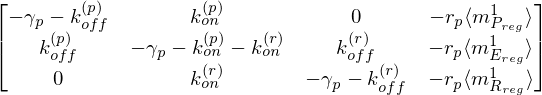

In [58]:
# Define augmented matrix for first moment
first_aug_reg = (Km_reg - Gp_reg).col_insert(3, 
                -Rp_reg * sympy.Matrix(m1_reg))
first_aug_reg

Now let's solve the system.

In [59]:
# Solve linear system for the first protein moments
first_sol_reg_p = sympy.solve_linear_system(first_aug_reg, *p1_reg)

Let's sum the elements of this solution to compute the global moment.

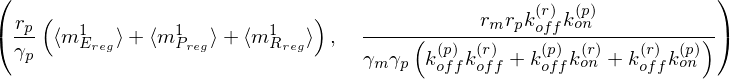

In [60]:
# Sum the results for the first moments
first_reg_p = sum(first_sol_reg_p.values()).simplify()
# Substitute the solutions for the mRNA first and zeroth moment
first_reg_p_s = first_reg_p.subs(first_sol_reg_m).\
                            subs(zero_sol_reg).simplify()
# Display solution in terms of the mRNA global first moment
first_reg_p,\
first_reg_p_s # Disiplay substituted solution.

#### fold-change.

A very relevant quantity to compute is the fold-change in gene expression. Since this quantity must be consistent between the thermodynamic framework and the master equation framework this quantity will constraint the value of the parameters that we obtain at the end of the day.

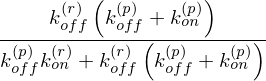

In [61]:
# Compute fold-change
fold_change = first_reg_p_s / first_unreg_p_s
fold_change.factor(kr_off)

This is as expected the same expression that we obtained at the mRNA level.

### mRNA-protein correlation three-state promoter

The computation of the second moment $\left\langle \mathbf{p}^2 \right\rangle$ depends on the correlation $\left\langle \mathbf{mp} \right\rangle$. To compute this correlation we have the equation
$$
\mathbf{0} = \left( \mathbf{K}^r - \mathbf{\Gamma}^r_m -  \mathbf{\Gamma}^r_p  \right)
             \left\langle \mathbf{mp} \right\rangle 
             + \mathbf{R}^r_m \left\langle \mathbf{p} \right\rangle
             + \mathbf{R}^r_p \left\langle \mathbf{m}^2 \right\rangle
$$
Let's define this augmented matrix.

In [62]:
# Define the string for the states
corr_reg = ['mp_{P_{reg}}', 'mp_{E_{reg}}', 'mp_{R_{reg}}']

# Define the zeroth moments
mp_reg = [moment_sympy(x, None) for x in corr_reg]
mp_reg

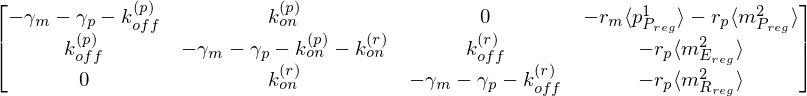

In [63]:
# define augmented matrix for correlation
corr_aug_reg = (Km_reg - Gm_reg - Gp_reg).col_insert(3,
                - Rm_reg * sympy.Matrix(p1_reg)\
                - Rp_reg * sympy.Matrix(m2_reg))
corr_aug_reg

In [64]:
# Solve linear system for the three moments
corr_sol_reg = sympy.solve_linear_system(corr_aug_reg, *mp_reg)

Now let's add each of these solutions to obtain the total correlation.

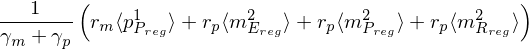

In [65]:
# Sum the terms of the correlation
corr_reg = sum(corr_sol_reg.values()).simplify()
# Substitutte relevant solutions
corr_reg_s = corr_reg.subs(first_sol_reg_p).subs(second_sol_reg_m).\
               subs(first_sol_reg_m).subs(zero_sol_reg)
    
# Display solution without substitutions
corr_reg

Let's now write this in terms of the global moments

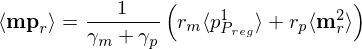

In [66]:
# Display correlation as a functiono f the second mRNA moment
corr_moments = corr_reg.collect(rp).subs(sum(m2_reg), mm2_reg)
sympy.Eq(mmpp_reg, corr_moments)

### Second moment three-state promoter

For the second moment we have an equation of the form
$$
\mathbf{0} = \left( \mathbf{K}^r - 2 \mathbf{\Gamma}^r_p \right) 
             \left\langle \mathbf{p}^2 \right\rangle
             + \mathbf{\Gamma}^r_p \left\langle \mathbf{p} \right\rangle
             + \mathbf{R}^r_p \mm
             + 2 \mathbf{R}^r_p \left\langle \mathbf{mp} \right\rangle
$$

Let's again define this augmented matrix.

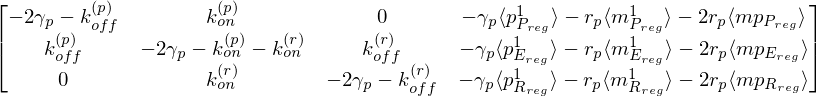

In [67]:
# Define augmented matrix for second moment
second_aug_reg = (Km_reg - 2 * Gp_reg).col_insert(3, 
                    - Gp_reg * sympy.Matrix(p1_reg)\
                    - Rp_reg * sympy.Matrix(m1_reg)\
                    - 2 * Rp_reg * sympy.Matrix(mp_reg))
second_aug_reg

Having defined the augmented matrix let's solve the linear system.

In [68]:
# Solve linear system for the three moments
second_sol_reg_p = sympy.solve_linear_system(second_aug_reg, *p2_reg)

Now we add all these elements to obtain the global second moment

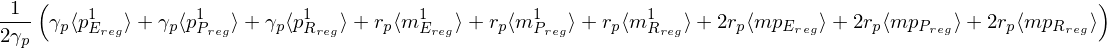

In [69]:
# Sum the soltuon of second moments
second_reg_p = sum(second_sol_reg_p.values()).simplify()
# Substitute relevant solutions
second_reg_p_s = second_reg_p.subs(corr_sol_reg).subs(first_sol_reg_p).\
                 subs(second_sol_reg_m).subs(first_sol_reg_m).\
                 subs(zero_sol_reg)

# Display solution without substitutions
second_reg_p

Let's now express this moment as a funciton of the global moments.

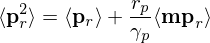

In [70]:
# Display solution
second_reg_moments_p = second_reg_p.\
            collect(gp).collect(rp).\
            subs(sum(p1_reg), pp1_reg).\
            subs(sum(m1_reg), mm1_reg).\
            subs(sum(2 * mp_reg), 2 * mmpp_reg).\
            expand().\
            subs(rp / (2 * gp) * mm1_reg, pp1_reg / 2)
sympy.Eq(pp2_reg,  second_reg_moments_p)

It has the exact same funcitonal form as the two-state promoter. The only difference is obviously the definition of each of the moments.

### Third moment three-state promoter $\ee{\bb{p}^3}$

#### Computing the cross correlations $\ee{\bb{mp}^2}$ and $\ee{\bb{m}^2\bb{p}}$

To compute the third moment $\ee{\bb{p}^3}$ we need to compute the correlation term $\ee{\bb{mp}^2}$. This correlation needs at the same time the correlation $\ee{\bb{m}^2\bb{p}}$. So we will solve for these two terms.

For the correlation $\ee{\bb{m}^2\bb{p}}$ we have the equation
$$
\bb{0} = \left( \bb{K}^r - 2 \bb{\Gamma}_p^r - \bb{\Gamma}_p^r \right) 
\ee{\bb{m}^2\bb{p}} +
\bb{R}_m^r \ee{\bb{p}} +
\left( \bb{R}_m^r + \bb{\Gamma}_m^r \right) \ee{\bb{mp}} +
\bb{R}_p^r \ee{\bb{m}^3}.
$$

Let's define this augmented matrix.

In [71]:
# Define the string for the states
corr_reg = ['m^2p_{P_{reg}}', 'm^2p_{E_{reg}}', 'm^2p_{R_{reg}}']

# Define the zeroth moments
m2p_reg = [moment_sympy(x, None) for x in corr_reg]
m2p_reg

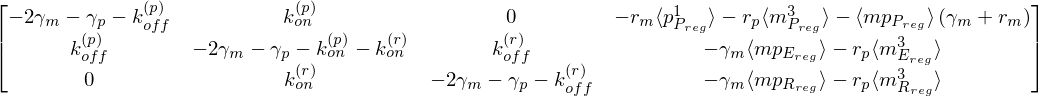

In [72]:
# define augmented matrix for correlation
m2p_aug_reg = (Km_reg - 2 * Gm_reg - Gp_reg).col_insert(3,
                  - Rm_reg * sympy.Matrix(p1_reg)\
                  - (Rm_reg + Gm_reg) * sympy.Matrix(mp_reg)\
                  - Rp_reg * sympy.Matrix(m3_reg))
m2p_aug_reg 

Let's now solve the system.

In [73]:
# Solve linear system for the three moments
m2p_sol_reg = sympy.solve_linear_system(m2p_aug_reg, *m2p_reg)

Let's add these terms to see the total correlation.

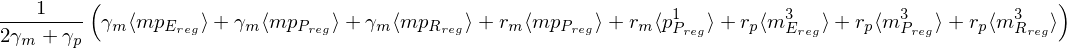

In [74]:
# Sum the terms of the m2pelation
corr_m2p_reg = sum(m2p_sol_reg.values()).simplify()
# Substitutte relevant solutions
corr_m2p_reg_s = corr_m2p_reg.subs(corr_sol_reg).\
              subs(first_sol_reg_p).subs(second_sol_reg_m).\
              subs(first_sol_reg_m).subs(zero_sol_reg)
    
# Display solution without substitutions
corr_m2p_reg

Now let's express this in terms of the global moments

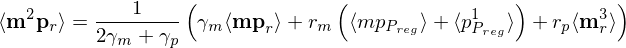

In [75]:
# Display m2pelation as a functiono f the second mRNA moment
m2p_moments_reg = corr_m2p_reg.collect(gm).subs(sum(mp_reg), mmpp_reg)\
                       .collect(rp).subs(sum(m3_reg), mm3_reg)\
                       .collect(rm)
sympy.Eq(mm2pp_reg, m2p_moments_reg)

#### $\ee{\bb{mp}^2}$
We have a solution for all these moments, so we can procced to compute the correlation $\ee{\bb{mp}^2}$. For that we have the equation
$$
\bb{0} = \left( \bb{K}^r - \bb{\Gamma}_m^r - 2 \bb{\Gamma}_p^r \right)
\ee{\bb{mp}^2} +
\bb{R}_m^r \ee{\bb{p}^2} +
2 \bb{R}_p^r \ee{\bb{m}^2\bb{p}} +
\bb{R}_p^r \ee{\bb{m}^2} +
\bb{\Gamma}_p^r \ee{\bb{mp}}.
$$

Let's define the agumented matrix for this correlation term.

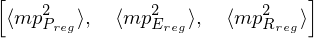

In [76]:
# Define the string for the states
corr_reg = ['mp^2_{P_{reg}}', 'mp^2_{E_{reg}}', 'mp^2_{R_{reg}}']

# Define the zeroth moments
mp2_reg = [moment_sympy(x, None) for x in corr_reg]
mp2_reg

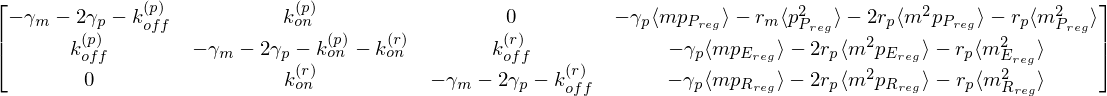

In [77]:
# define augmented matrix for correlation
mp2_aug_reg = (Km_reg - Gm_reg - 2 * Gp_reg).col_insert(3,
                  - Rm_reg * sympy.Matrix(p2_reg)\
                  - 2 * Rp_reg * sympy.Matrix(m2p_reg)\
                  - Rp_reg * sympy.Matrix(m2_reg)\
                  - Gp_reg * sympy.Matrix(mp_reg))
mp2_aug_reg 

Now we can solve the system

In [78]:
# Solve linear system for the three moments
mp2_sol_reg = sympy.solve_linear_system(mp2_aug_reg, *mp2_reg)

Again we add the individual terms to compute the total correlation term.

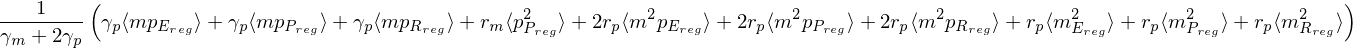

In [79]:
# Sum the terms of the mp2elation
corr_mp2_reg = sum(mp2_sol_reg.values()).simplify()
# Substitutte relevant solutions
corr_mp2_reg_s = corr_mp2_reg.subs(corr_sol_reg).\
              subs(first_sol_reg_p).subs(second_sol_reg_m).\
              subs(first_sol_reg_m).subs(zero_sol_reg)
    
# Display solution without substitutions
corr_mp2_reg

In terms of the total correlation terms this gives

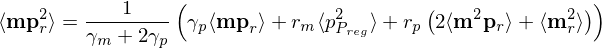

In [80]:
# Display correlation as a function of the second mRNA moment
mp2_moments_reg = corr_mp2_reg.collect(gp).subs(sum(mp_reg), mmpp_reg)\
                       .collect(rp).subs(sum(m2_reg), mm2_reg)\
                       .subs(sum(2 * m2p_reg), 2 * mm2pp_reg)
sympy.Eq(mmpp2_reg, mp2_moments_reg)

#### $\ee{\bb{p}^3}$

Finally having these two correlations in hand we can compute the third moment of the protein distribution $\ee{\mm{p}^3}$. For that we have the equation
$$
\bb{0} = \left( \bb{K}^r - 3 \bb{\Gamma}_p^r \right) \ee{\bb{p}^3} +
3 \bb{\Gamma}_p^r \ee{\bb{p}^2} -
\bb{\Gamma}_p^r \ee{\bb{p}} +
3 \bb{R}_p^r \ee{\bb{mp}^2} +
3 \bb{R}_p^r \ee{\bb{mp}} +
\bb{R}_p^r \ee{\bb{m}}.
$$

Let's define this agumented matrix.

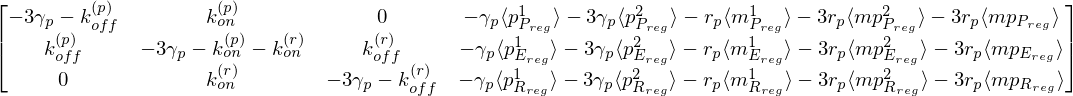

In [81]:
# define augmented matrix for correlation
p3_aug_reg = (Km_reg - 3 * Gp_reg).col_insert(3,
                  - 3 * Gp_reg * sympy.Matrix(p2_reg)\
                  - Gp_reg * sympy.Matrix(p1_reg)\
                  - 3 * Rp_reg * sympy.Matrix(mp2_reg)\
                  - 3 * Rp_reg * sympy.Matrix(mp_reg)\
                  - Rp_reg * sympy.Matrix(m1_reg))
p3_aug_reg 

We now solve the system.

In [82]:
third_sol_reg_p = sympy.solve_linear_system(p3_aug_reg, *p3_reg)

And compute the total third moment again by adding the individual terms.

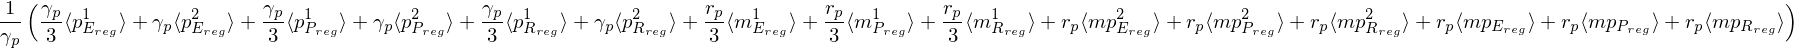

In [83]:
# Sum the soltuon of third moments
third_reg_p = sum(third_sol_reg_p.values()).simplify()
# Substitute relevant solutions
third_reg_p_s = third_reg_p.subs(mp2_sol_reg).\
                    subs(m2p_sol_reg).\
                    subs(second_sol_reg_p).\
                    subs(corr_sol_reg).\
                    subs(first_sol_reg_p).\
                    subs(third_sol_reg_m).\
                    subs(second_sol_reg_m).\
                    subs(first_sol_reg_m).\
                    subs(zero_sol_reg)

# Display solution without substitutions
third_reg_p

In term of the total moments this is given by

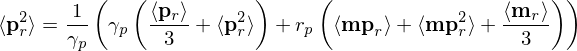

In [84]:
# Display solution
third_reg_moments_p = third_reg_p.\
            collect(gp).\
            subs(sum(p1_reg) / 3, pp1_reg / 3).\
            subs(sum(p2_reg), pp2_reg).\
            collect(rp).\
            subs(sum(m1_reg) / 3, mm1_reg / 3).\
            subs(sum(mp2_reg), mmpp2_reg).\
            subs(sum(mp_reg), mmpp_reg)
sympy.Eq(pp2_reg,  third_reg_moments_p)

### Export `lambdify` functions to `dill` objects

Since we want to keep the notebooks in an organized fashion, the numerical exploration of these functions will be done in a different notebook. Therefore here we will generate `lambdify` functions that will be saved into an object using the `dill` library.

Let' first generate lambdify functions for the moments.

In [85]:
# Define array containing variables
var = [kr_on, kr_off, kp_on, kp_off, rm, gm, rp, gp]
# Define lambdify functions for the first three moments
first_reg_num = sympy.lambdify(var, first_reg_p_s)
second_reg_num = sympy.lambdify(var, second_reg_p_s)
third_reg_num = sympy.lambdify(var, third_reg_p_s)

In [86]:
# Change dill setting to allow the export of the functions
dill.settings['recurse'] = True

# Open file to save functions
with open(tmpdir + 'three_state_protein_lambdify.dill', 'wb') as file:
    dill.dump(first_reg_num, file)
    dill.dump(second_reg_num, file)
    dill.dump(third_reg_num, file)